# STAT 207 Homework 6 [25 points]

## Deeper Dive into Hypothesis Testing and Introduction to Linear Regression

Due: Thursday, March 13, end of day (11:59 pm CT)

Late submissions accepted until Friday, March 14 at noon

<hr>

## Imports 

Run the following code cell to import the necessary packages into the file.  You may import additional packages, as needed for this assignment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Case Study: County Housing Information

The provided **county.csv** file contains various statistics about the population of every county in the United States.  You can read more about this dataset and its variables here:

https://www.openintro.org/data/index.php?data=county

**Observational Unit**: Each row contains data recorded for a county

**Variables**: 

- In question 1, we will focus on the `multi_unit` variable in the data, which reports the percent of housing units in each county that are in multi-unit structures (e.g. apartments).  
- In question 2, we will add the `homeownership` variable, which records the rate of home ownership.  

Below, we read in the data as `df` for later analysis.

In [2]:
df = pd.read_csv('county.csv', na_values = ['data unavailable'])
df

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Sweetwater County,Wyoming,37613.0,43806,43534.0,-3.57,12.0,73.7,14.6,4.55,no,some_college,30282.59,71083.0,none
3138,Teton County,Wyoming,18251.0,21294,23265.0,4.21,6.8,60.8,31.9,2.99,no,bachelors,48557.37,80049.0,partial
3139,Uinta County,Wyoming,19742.0,21118,20495.0,-2.22,14.9,73.7,17.0,4.50,no,some_college,27048.12,54672.0,none
3140,Washakie County,Wyoming,8289.0,8533,8064.0,-4.31,12.8,70.9,10.0,4.08,no,some_college,27494.83,51362.0,none


## 1. Deeper Dive Into p-Values and Significance Levels [5 points] 

**a)** Calculate the mean multi-unit housing rate for the data.

In [3]:
df['multi_unit'].mean()

12.321896880967534

**b)** We will start by creating a sampling distribution of the mean multi-unit housing rate for 5 randomly selected counties.  Record 5000 repetitions in your simulated sampling distribution.

In [4]:
sampling_distribution_mean = []

for i in range(5000):
    sample = df['multi_unit'].sample(n = 5, replace = True) 
    sampling_distribution_mean.append(sample.mean())


sampling_distribution_mean = pd.DataFrame(sampling_distribution_mean)
sampling_distribution_mean

,0
0,5.34
1,10.62
2,9.12
3,18.30
4,16.26
...,...
4995,15.22
4996,7.50
4997,7.88
4998,11.94


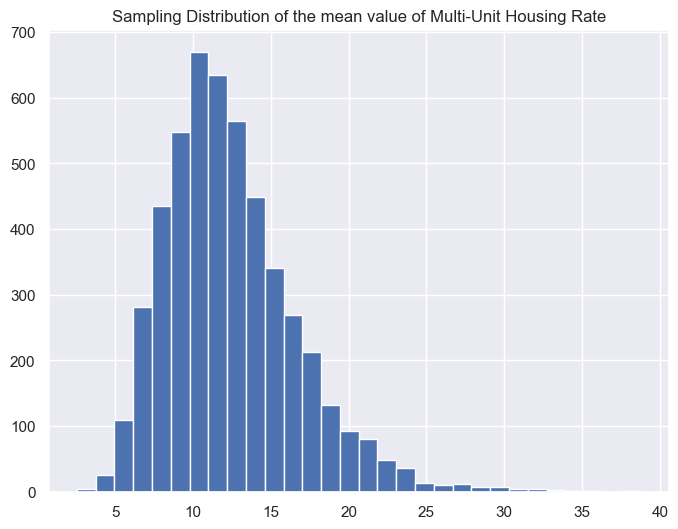

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(sampling_distribution_mean, bins=30)
plt.title('Sampling Distribution of the mean value of Multi-Unit Housing Rate')
plt.grid(True)

plt.show()

**c)** Now, we will use the following hypotheses as the framework for our next parts:

$H_0: \mu = 12.32$

$H_a: \mu > 12.32$

First, take a random sample of size 5 from the population of counties **without replacement**.  Within the `sample` function, use the argument `random_state = 207`.  Using this random sample along with the sampling distribution from part **b**, calculate the p-value for the test above.

In [5]:
random_samp = df.sample(5, random_state = 207, replace = False)
sample_mean = random_samp['multi_unit'].mean()

sample_mean

14.76

In [6]:
p_value = np.mean(sampling_distribution_mean >= sample_mean)

p_value

0.2454

**d)** Now, we'd like to explore the behavior of a p-value.  In order to do this, we will calculate p-values for many different random samples of size 5.  In essence, we will repeat the process from **part c** many times, although we will **not** use the `random_state` argument for our repeated samples.

Specifically, you should:
- gather a random sample of size 5 without replacement (which mimics a realistic sampling scheme in this scenario),
- use the sampling distribution from part **b** to calculate the corresponding p-value, and
- save the p-value for future analysis

Repeat this process 500 times, so that you have 500 different p-values in your data to explore.

*Hint:* As a first step, determine the appropriate code to calculate the p-value for a single random sample of size 5.  Then, once you have code that works for a single random sample, generalize it so that you can repeat this for 500 different samples.

In [7]:
p_values = []

for i in range(500):
    random_sample = df['multi_unit'].sample(n=5, replace=False)
    sample_mean = random_sample.mean()
    
    p_value = np.mean(sampling_distribution_mean >= sample_mean)
    p_values.append(p_value)

p_values = np.array(p_values)


p_values


array([0.8664, 0.507 , 0.4456, 0.1236, 0.6144, 0.1336, 0.344 , 0.3014,
       0.2064, 0.6608, 0.7624, 0.4832, 0.225 , 0.3056, 0.9436, 0.2676,
       0.0156, 0.9272, 0.507 , 0.2798, 0.0562, 0.7508, 0.7014, 0.4698,
       0.685 , 0.2082, 0.8714, 0.2202, 0.1154, 0.91  , 0.9856, 0.1518,
       0.044 , 0.6676, 0.7962, 0.83  , 0.2766, 0.195 , 0.6562, 0.0084,
       0.48  , 0.8346, 0.3956, 0.765 , 0.2148, 0.9398, 0.869 , 0.0244,
       0.5   , 0.3776, 0.3174, 0.8884, 0.0924, 0.1904, 0.5464, 0.6676,
       0.7602, 0.7854, 0.952 , 0.2642, 0.3728, 0.9908, 0.5528, 0.414 ,
       0.9496, 0.4456, 0.602 , 0.0324, 0.806 , 0.6168, 0.1734, 0.6534,
       0.7868, 0.3584, 0.4862, 0.5246, 0.2668, 0.5362, 0.8916, 0.643 ,
       0.592 , 0.1894, 0.6654, 0.0924, 0.7666, 0.0012, 0.1078, 0.507 ,
       0.0908, 0.5306, 0.4494, 0.2676, 0.7168, 0.4238, 0.6682, 0.8112,
       0.9622, 0.1246, 0.643 , 0.2948, 0.3776, 0.8814, 0.5116, 0.971 ,
       0.1722, 0.5122, 0.4262, 0.701 , 0.9136, 0.3014, 0.853 , 0.4052,
      

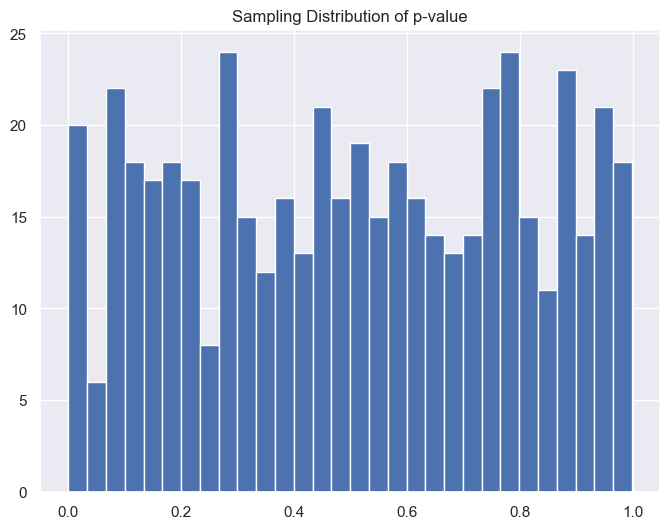

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(p_values, bins=30)
plt.title('Sampling Distribution of p-value')

plt.show()

In [17]:
reject_proportion = np.mean(p_values < 0.05)
reject_proportion

0.046

In [18]:
significance_level_2 = 0.2
reject_proportion2 = np.mean(p_values < 0.2)

reject_proportion2

0.2

**e)** Finally, suppose that we consider Champaign and its four neighboring counties (Vermilion, Ford, Piatt, and Douglas) as a sample of counties from the US.  First, calculate the sample mean multi-unit rate of these five counties from Illinois.  Then, using your simulated sampling distribution, calculate the p-value based on these five counties.

**Tip**: You may want to review Homework 4.  We can use the **`&`** ("and") operator to indicate that we want **both** conditions on either side of the operator to be met.  We can use the **`|`** ("or") operator to indicate that we want **at least one** of the conditions to be met.  We can also chain these operators together if we need to represent more complex operations.

In [9]:
select_counties = df[(df['name'].str.contains('Champaign|Vermilion|Ford|Piatt|Douglas')) 
                     & (df['state'] == 'Illinois')]

sample_mean_select_counties = select_counties['multi_unit'].mean()

p_selected_counties = np.mean(sampling_distribution_mean >= sample_mean_select_counties)

sample_mean_select_counties, p_selected_counties

(15.260000000000002, 0.2152)

In [10]:
select_counties

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
604,Champaign County,Illinois,179669.0,201081,209399.0,1.83,21.4,55.9,35.2,4.24,yes,some_college,29619.49,49586.0,NaN
615,Douglas County,Illinois,19922.0,19980,19748.0,-0.57,12.1,78.3,11.2,4.01,no,hs_diploma,25796.91,52261.0,partial
621,Ford County,Illinois,14241.0,14081,13280.0,-2.86,15.7,79.1,7.9,4.70,yes,some_college,27234.78,50851.0,none
668,Piatt County,Illinois,16365.0,16729,16445.0,0.09,5.4,81.7,7.5,3.99,yes,some_college,33598.78,67360.0,NaN
686,Vermilion County,Illinois,83919.0,81625,77909.0,-3.31,19.8,71.3,14.5,6.29,yes,hs_diploma,23759.02,44930.0,NaN


## 2. Linear Regression [4 points]

How does the rate of homeownership affect the percent of housing units that are in multi-unit structures?

**a)** Generate a visualization to observe the relationship between the rate of homeownership and the percentage of multi-unit structure housing in the county.  Be sure to place each variable on the correct axes based on the underlying question above.

<function matplotlib.pyplot.show(close=None, block=None)>

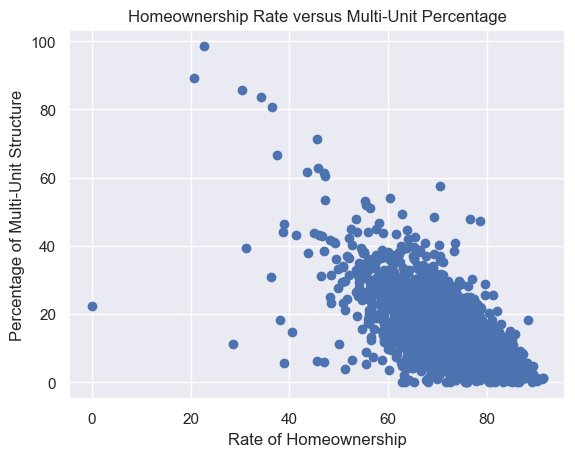

In [11]:
plt.scatter(df['homeownership'], df['multi_unit'])

plt.title('Homeownership Rate versus Multi-Unit Percentage')
plt.xlabel('Rate of Homeownership')
plt.ylabel('Percentage of Multi-Unit Structure')
plt.grid(True)

plt.show

**b)** Fit a linear model that predicts the `multi_unit` from `homeownership`.  Print the summary of the model.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[['homeownership']], df['multi_unit'])

print('Slope is: ', model.coef_)

print('Intercept is: ', model.intercept_)

Slope is:  [-0.79743071]
Intercept is:  70.7468176744347


In [ ]:
homeownership_rate = 62.1

fitted_val = model.intercept_ + model.coef_ * homeownership_rate

fitted_val

array([21.22637061])

In [14]:
q2_multi_unit_rate = 19.7

residual = q2_multi_unit_rate - fitted_val

residual

array([-1.52637061])

Remember to keep all your cells and hit the save icon above periodically to checkpoint (save) your results on your local computer. Once you are satisified with your results restart the kernel and run all (Kernel -> Restart & Run All). **Make sure nothing has changed**. Checkpoint and exit (File -> Save and Checkpoint + File -> Close and Halt). Follow the instructions on the Homework 6 Canvas Assignment to submit your notebook to GitHub.